<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Homework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The equation for planetary motion is: $$\begin{align}F=\frac{GmM}{r^2}\text{, where }r=\sqrt{x^2+y^2}\end{align}$$Also, since $F=ma$,

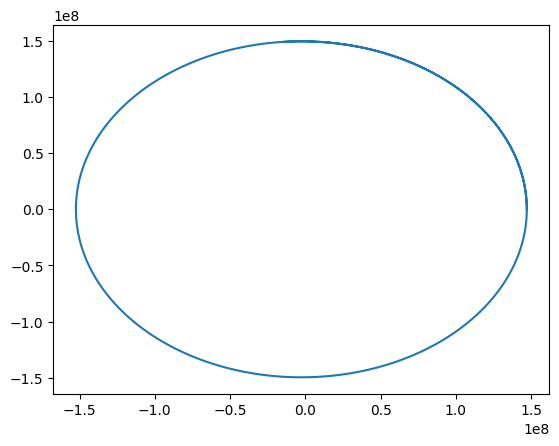

In [4]:


#@title
from scipy.integrate import ode
from scipy.integrate import RK45
import numpy as np
import matplotlib.pyplot as plt


#@title
# create derivatives function

def func(t, z):
  gm = 1.327E11
  y = z
  val = (y[0]*y[0] + y[2]*y[2])**-1.5
  A = gm*val*-1
  dydt = np.zeros((4,))
  dydt[0] = y[1]
  dydt[1] = y[0] #-1*gm*val
  dydt[1] = dydt[1]*A
  dydt[2] = y[3]
  dydt[3] = y[2] #-1*gm*val
  dydt[3] = dydt[3]*A
  return dydt

# initial conditions
z0_x = 147.1E6
z0_vx = 0
z0_y = 0
z0_vy = 30.3
z0=[z0_x,z0_vx,z0_y,z0_vy]

# setup solver
t0 = 0
t_bound = 100000000
rtol=0.01
maxsteps= 20000 #np.inf
solver = RK45(func, t0, z0, t_bound, max_step=maxsteps,rtol=rtol)



#@title
t_ = []
y_ = []
for i in np.arange(2000):
  solver.step()
  t_.append(solver.t)
  y_.append(solver.y)

# collect results
y_0 = [y[0] for y in y_]
y_1 = [y[1] for y in y_]
y_2 = [y[2] for y in y_]
y_3 = [y[3] for y in y_]

plt.plot(y_0, y_2)
plt.show()

Solver convergence detected, exiting...


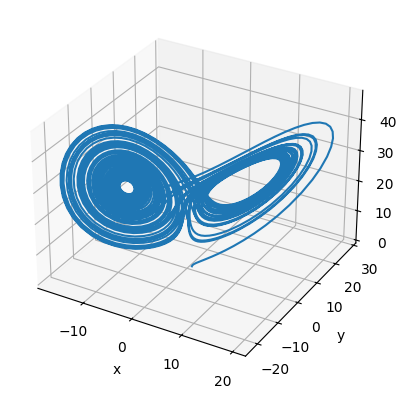

In [98]:
rho, sigma, beta = 28, 10, 8/3

def double_pen(t, y):
  x, y, z = y
  dxdt = sigma*(y-x)
  dydt = x*(rho-z) - y
  dzdt = x*y - beta*z
  return [dxdt, dydt, dzdt]


ic = [1, 0, 0]

t0 = 0
t_bound = 50
rtol=0.0000001
maxsteps= 20 #np.inf
solver = RK45(double_pen, t0, ic, t_bound, max_step=maxsteps,rtol=rtol)

ts = []
ys = []

try:
  for i in np.arange(5000):
    solver.step()
    ts.append(solver.t)
    ys.append(solver.y)
except:
  print('Solver convergence detected, exiting...')

x, y, z = [y[0] for y in ys], [y[1] for y in ys], [y[2] for y in ys]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(x, y, z)
plt.show()